<a href="https://colab.research.google.com/github/rajashekar028/StartupFundingPrediction/blob/main/Copy_of_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4zCgRu4QVMSDv20GnZ5w7wK2J69dhNA8grmGyQvQut5tLHm88mWm4
Mounted at /content/drive


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/data_driven_investment_1.csv')

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [ ]:
df.shape

(1502175, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [ ]:
df.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.502175e+06,877732.000000,2414.000000,118087.000000,877715.000000,1.050875e+06,2.255000e+03,877665.000000,352269.000000,1.502175e+06
mean,2.019719e+07,1.623425,2014.761806,0.398434,3.940650,1.067470e-03,7.730093e+07,5.963737,0.144645,1.607003e-03
std,5.532865e+03,2.253530,3.970991,0.208612,4.537119,1.690396e-02,3.259730e+08,9.593691,0.130948,4.005523e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417683,2014.000000,0.235294,1.875000,3.022203e-07,2.014807e+06,1.085473,0.056641,0.000000e+00
50%,2.020030e+07,0.889808,2016.000000,0.388769,2.933333,5.137744e-06,8.151818e+06,2.726575,0.107383,0.000000e+00
75%,2.020040e+07,1.917317,2017.000000,0.546218,4.500000,7.543001e-05,3.700000e+07,6.613983,0.190829,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


In [ ]:
df.describe(include='object')

,UUID,Application Category,Business Models,City,Company Stage,Feed Name,Latest Funded Date,Overview,Practice Areas,Region
count,1500693,1502175,2414,2407,2414,2414,2414,2414,2414,1502175
unique,147741,48,293,30,12,180,240,323,132,1
top,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,Education,Social Platforms > Interest Based > Education ...,Bangalore,Seed,Social Platforms\nTest Preparation Tech,2020-09-25,Q&A-based education community,FinTech,National
freq,2671,202514,232,686,1116,233,232,232,306,1502175


In [ ]:
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Region', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind'],
      dtype='object')

0    1499761
1       2414
Name: funding_ind, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


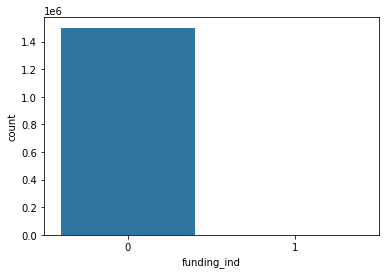

In [ ]:
print(df['funding_ind'].value_counts())
sns.countplot(df['funding_ind'])

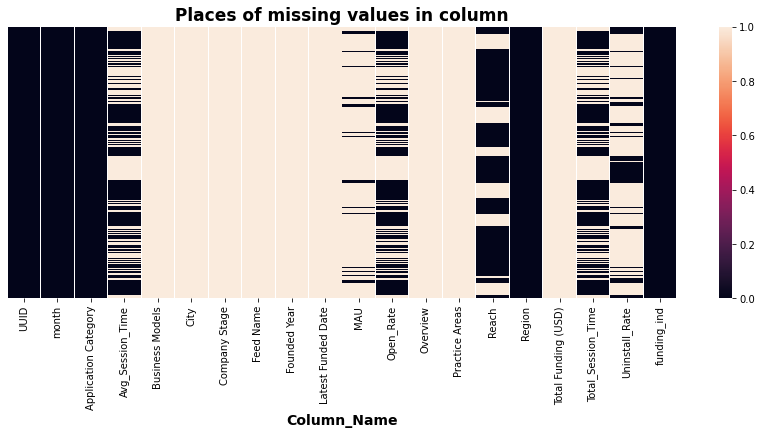

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
df.columns


There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details.
This funding can be either seed funding, Series A, Series B, so on and so forth.

In [ ]:
df['month'].value_counts()

In [ ]:
df['month'].max()

In [ ]:
df['month'].min()

In [ ]:
df["UUID"].value_counts().shape

In [ ]:
df["Application Category"].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df["Application Category"])

In [ ]:
sns.kdeplot(df['Avg_Session_Time'].dropna())

In [ ]:
sns.kdeplot(df['Total_Session_Time'])

In [ ]:
Funded_df=df[df['funding_ind']==1]

In [ ]:
Funded_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1
1500590,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000365,National,14634837.0,NaN,0.077348,1


month


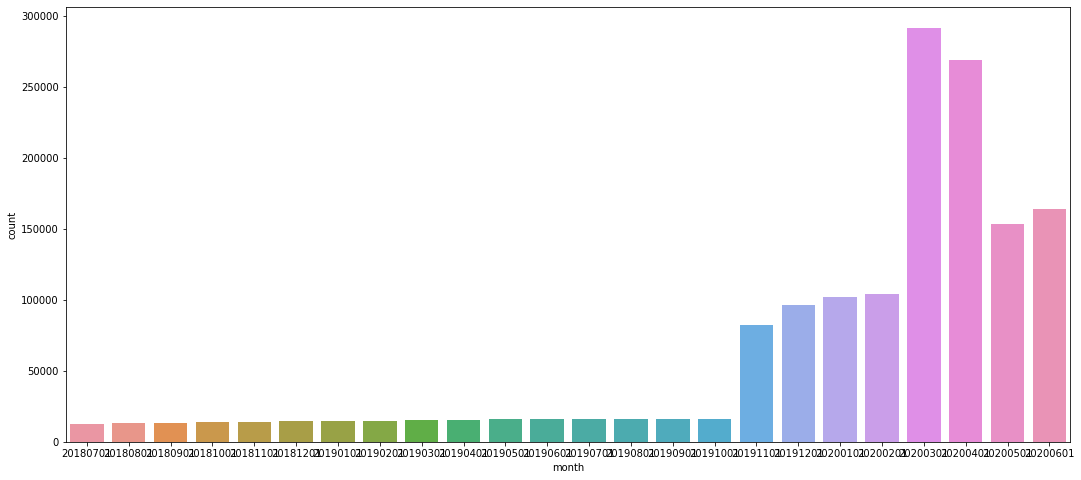

Application Category


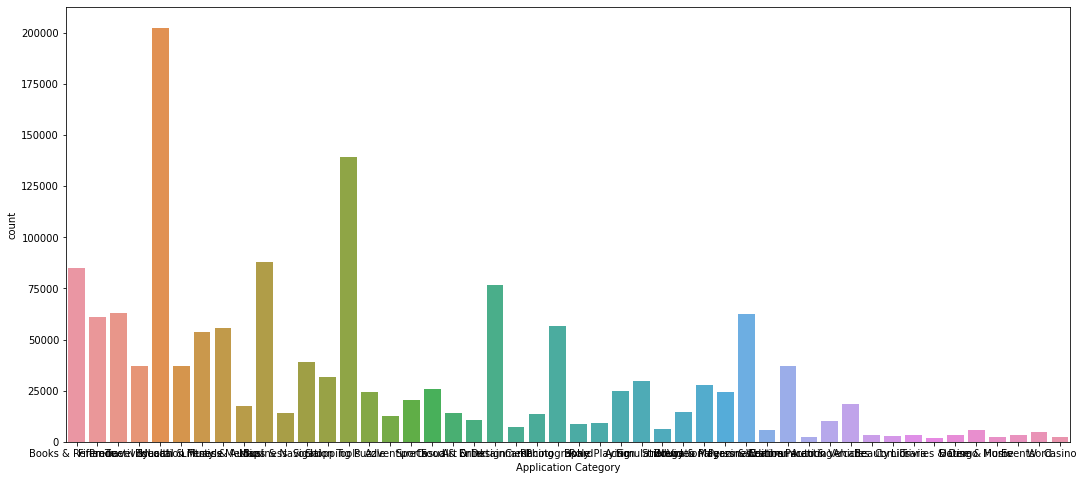

City


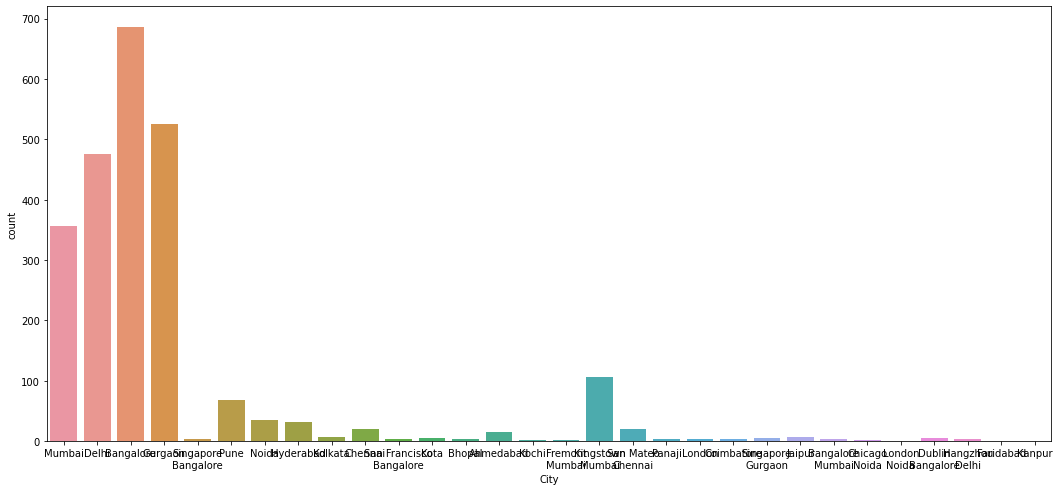

Company Stage


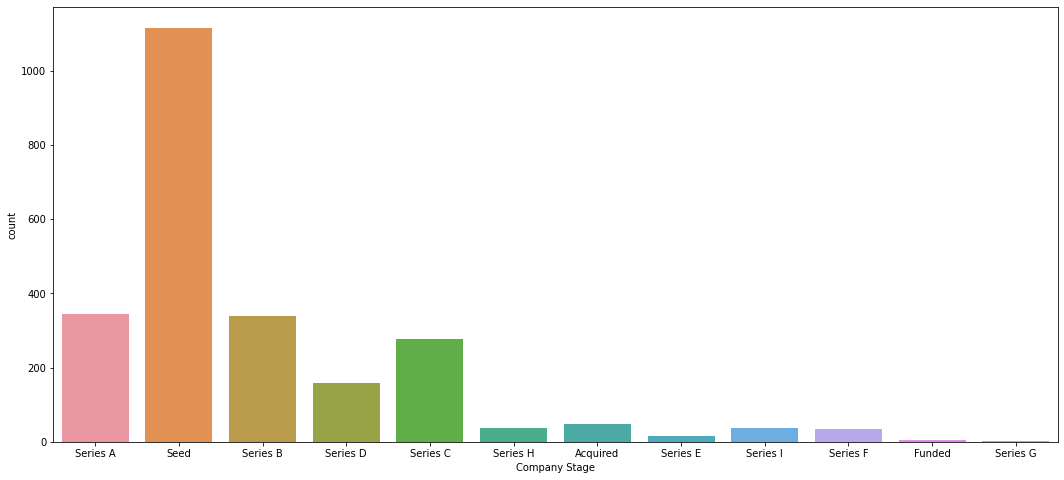

Founded Year


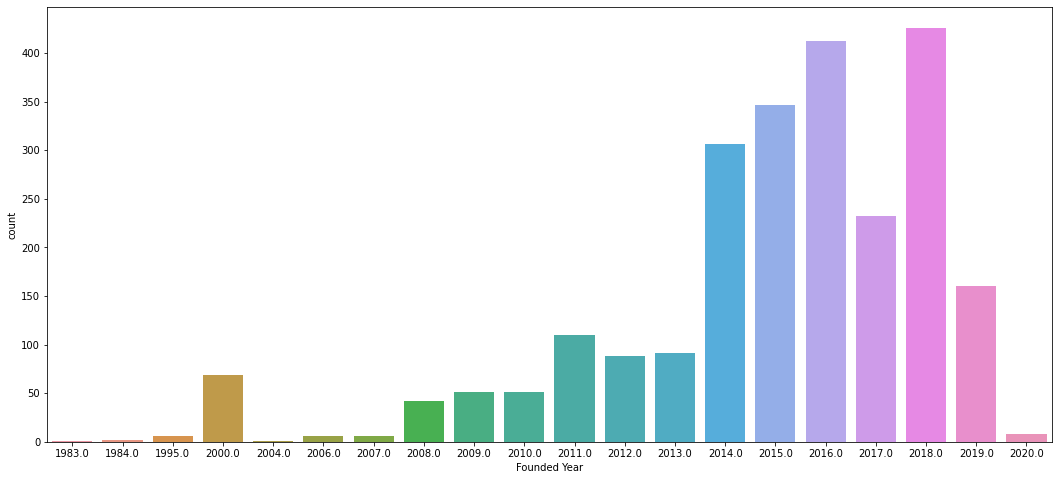

funding_ind


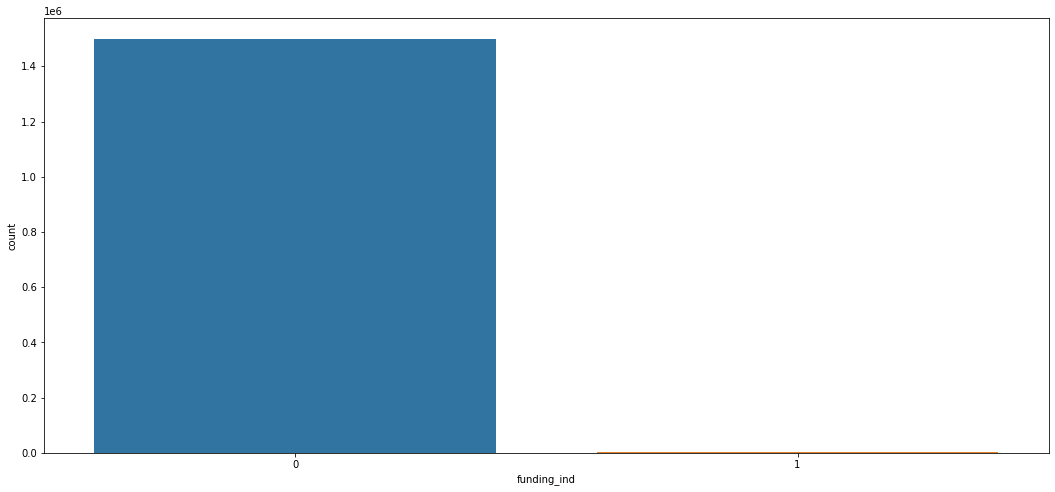

In [ ]:


for column in df.columns:
  if df[column].nunique() > 1:
    if df[column].nunique() < 100:
        print(column)
        plt.figure(figsize=(18,8)) 
        sns.countplot(x=column,data=df)
        plt.show()



In [ ]:
df['month']=pd.to_datetime(df['month'],format='%Y-%m-%d')

In [ ]:
df['Founded Year']=pd.to_datetime(df['Founded Year'],format='%Y').dropna()

In [ ]:
df['Latest Funded Date']=pd.to_datetime(df['Latest Funded Date'],format='%Y-%m-%d').dropna()

In [ ]:
df[(df["UUID"].isna()) & (df['funding_ind']==0)].head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
647,NaN,1970-01-01 00:00:00.020180801,Tools,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000158,National,NaN,NaN,0.160000,0
2210,NaN,1970-01-01 00:00:00.020180801,Action,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000056,National,NaN,NaN,0.714286,0
4033,NaN,1970-01-01 00:00:00.020180801,Photography,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.001433,National,NaN,NaN,0.000000,0
5907,NaN,1970-01-01 00:00:00.020180801,Auto & Vehicles,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,NaN,0
6074,NaN,1970-01-01 00:00:00.020180801,Business,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000864,National,NaN,NaN,0.116788,0


In [ ]:
df[(df["UUID"].isna()) & (df['funding_ind']==1)].head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind


In [ ]:
df=df[~df["UUID"].isna()]

In [ ]:
df["UUID"].unique()

array(['c1ad38e2d357610c129657d870ede902e8abfcb9',
       'd841e670d9191f896a0cbc75961920887b375756',
       '0a59d138b3eaccd22b665eae70c756fef83ddb63', ...,
       'edcbe5f1ad6b3c0400e60d38a07a5cdaabc4b1a8',
       'e9f9a92b05dbb720db6d49a85b2ed243fe373ccd',
       '6495e1a3ddf8ac88f119ba60eb5880da263d588c'], dtype=object)

In [ ]:
grouped=df.groupby("UUID",sort=True)

In [ ]:
grouped_df=grouped.mean()
grouped_df["UUID"]=grouped_df.index
grouped_df.index=range(len(grouped_df))

In [ ]:
grouped_df.head()

,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID
0,NaN,NaN,NaN,1.396504e-06,NaN,NaN,NaN,0.0,000066f130e3b972364c505c805e2cddee68816d
1,NaN,NaN,NaN,3.022203e-07,NaN,NaN,NaN,0.0,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b
2,0.978822,NaN,2.0,7.147993e-06,NaN,2.449867,NaN,0.0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3
3,0.277208,NaN,1.5,2.497145e-07,NaN,0.372308,NaN,0.0,000127cbe70aeeab81734b68f409176bd1f1fde8
4,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,0.0,00017d2a013dc43f0e34de1be4beca443713ec80


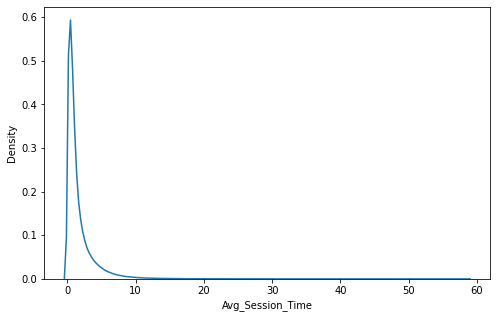

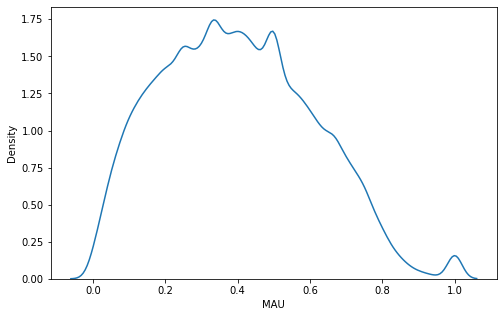

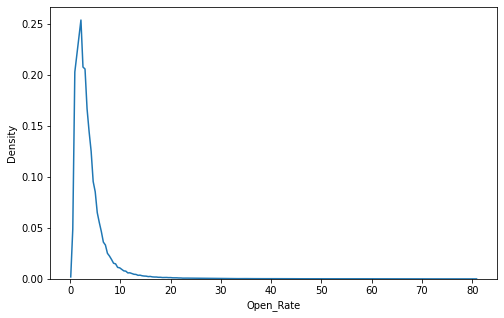

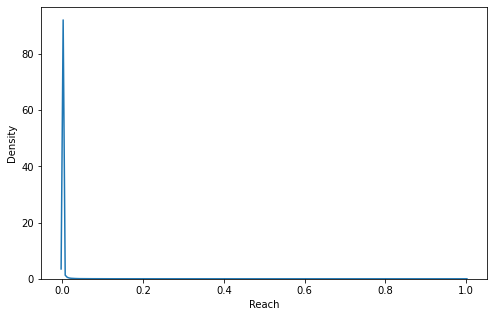

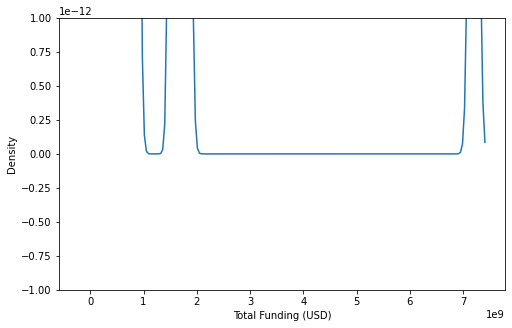

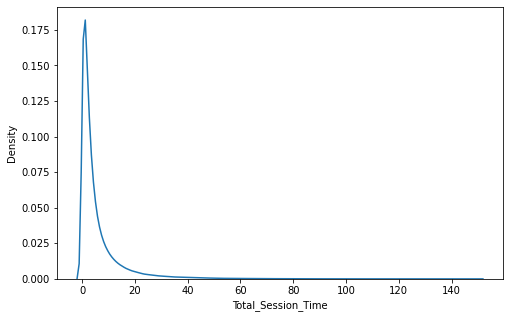

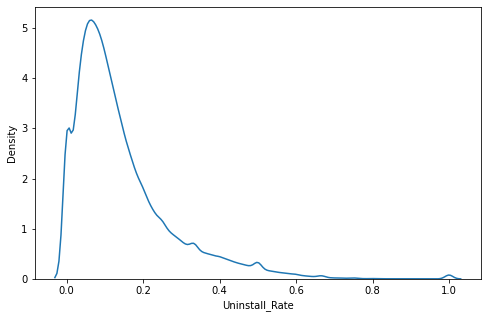

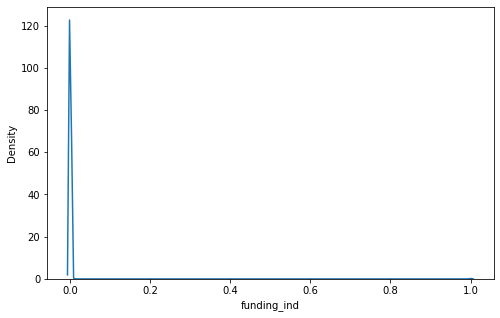

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
rgb_values = sns.color_palette("Set1", 9)
# Map continents to the colors
numerical_features=grouped_df.describe().columns

for col in numerical_features:
  plt.figure()
  sns.kdeplot(df[col])

In [ ]:
grouped_df[grouped_df['funding_ind']==1]

,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID
8766,NaN,NaN,NaN,1.972088e-07,6014060.0,NaN,NaN,1.0,0f6f58df028acaf2712ba187680130ba84c7669f
10419,NaN,NaN,NaN,4.008247e-07,NaN,NaN,NaN,1.0,125191a04ae5c50b08fff009a5be4a803011d144
13127,NaN,NaN,NaN,4.469234e-07,NaN,NaN,NaN,1.0,171cbf6b8fb2fee00a0e1a0ac16539cb120d2e30
25208,NaN,NaN,NaN,4.469234e-07,1928674.0,NaN,NaN,1.0,2bf786029e6df33f6e840c351560db0550da0ecd
28188,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,1.0,3121def4df2090828ca11cc6b630bd69b6fcafdf
38314,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,1.0,4287e7bbe58086fc5643f3b248fe73de85e9114f
59895,NaN,NaN,NaN,3.022203e-07,NaN,NaN,NaN,1.0,67f7e338ad743ee393a54eceaf882d05fecf717b
62751,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,1.0,6cf6760228422d7fbb08d774a7e2ea5cbf2cf33e
84821,NaN,NaN,NaN,1.972088e-07,4000000.0,NaN,NaN,1.0,937d7c6eb4af7ea0caad34bb65631b93a200d17d
92404,NaN,NaN,NaN,3.022203e-07,74127145.0,NaN,NaN,1.0,a073f99bd204b42471401082937b93c1916d1c2e


In [ ]:
random_var=df[df["UUID"]=='4f765967ae5af21b3b308d8f24859154856f6e39']

In [ ]:
df[(df["UUID"]=='4f765967ae5af21b3b308d8f24859154856f6e39')&(df["funding_ind"]==1)]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
15453,4f765967ae5af21b3b308d8f24859154856f6e39,1970-01-01 00:00:00.020190601,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014-01-01,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.002397,National,50000000.0,NaN,0.225067,1
731697,4f765967ae5af21b3b308d8f24859154856f6e39,1970-01-01 00:00:00.020190701,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014-01-01,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.001985,National,50000000.0,NaN,0.171074,1
762179,4f765967ae5af21b3b308d8f24859154856f6e39,1970-01-01 00:00:00.020190801,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014-01-01,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.002719,National,50000000.0,NaN,0.147094,1


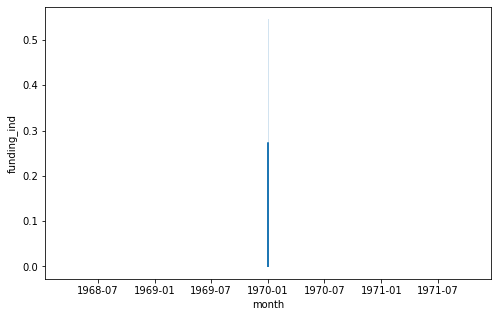

In [ ]:
sns.lineplot(data=random_var,x='month',y='funding_ind')

In [ ]:
lis_uuid=df[df['funding_ind']==1][:10]['UUID'].to_list()

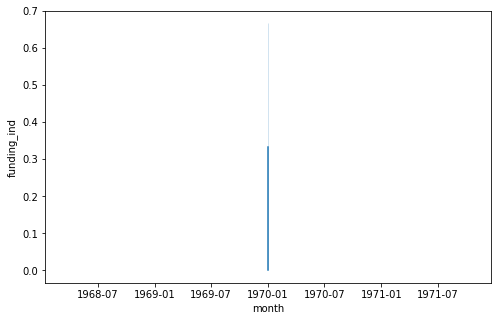

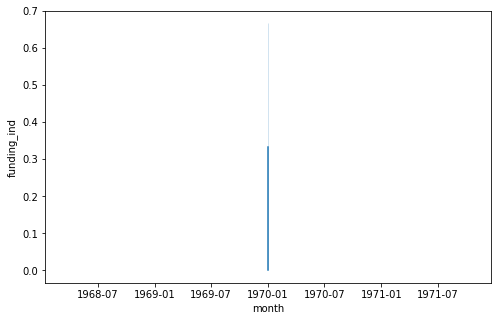

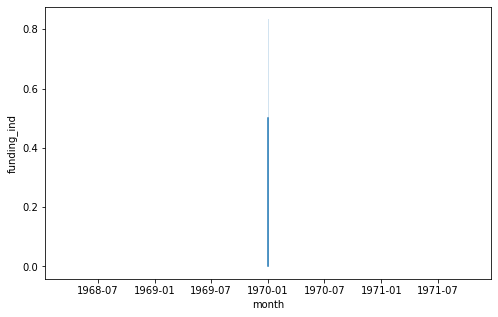

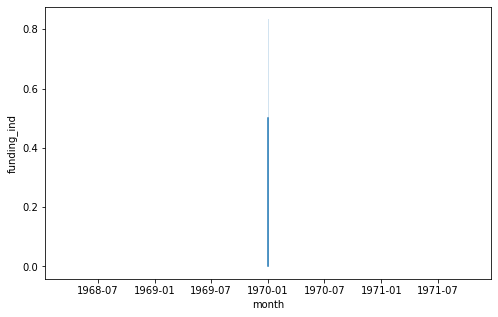

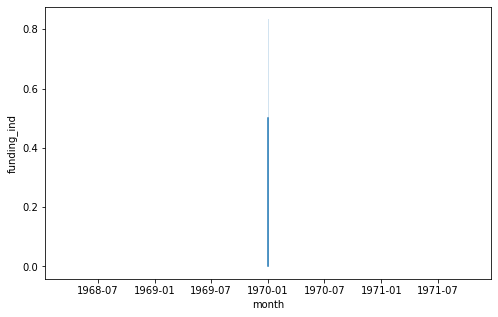

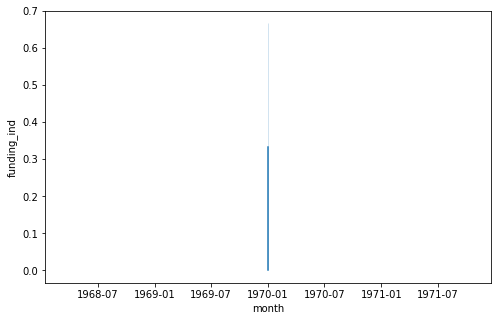

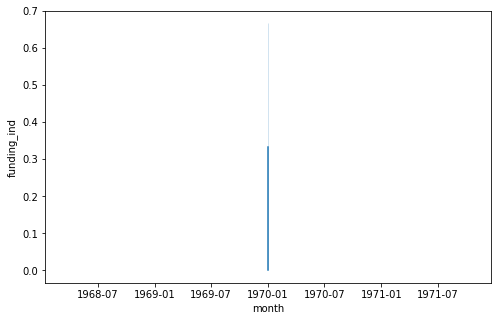

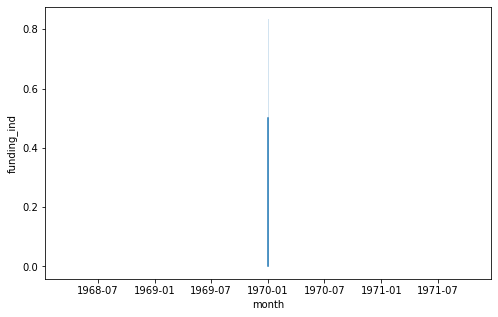

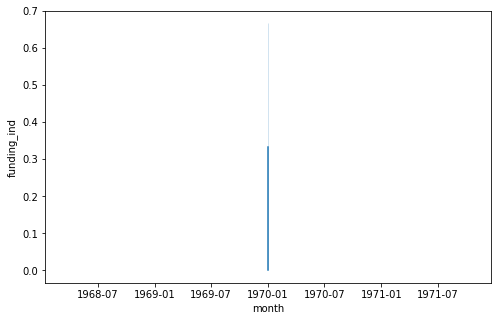

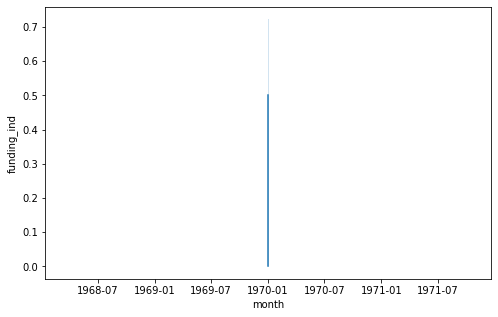

In [ ]:
for id in lis_uuid:
    random_var=df[df["UUID"]==id]
    sns.lineplot(x='month',y='funding_ind',data=random_var)
    plt.show()

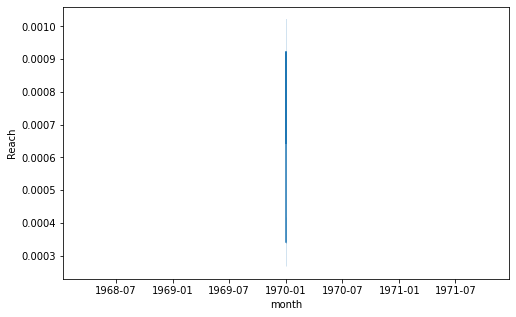

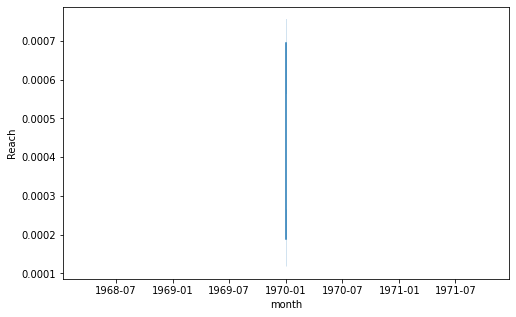

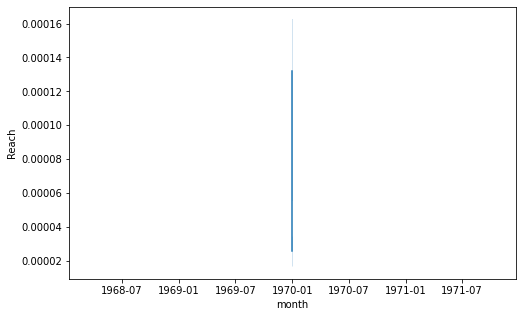

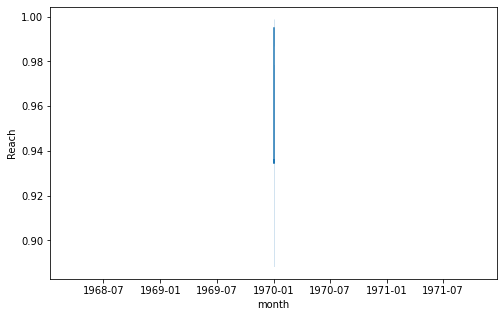

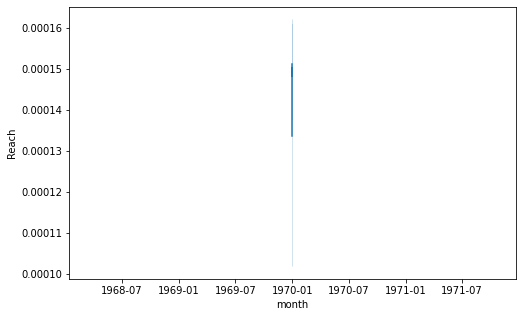

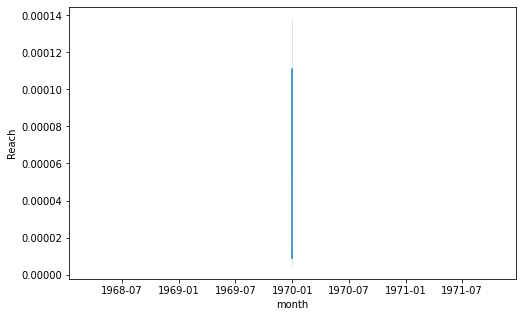

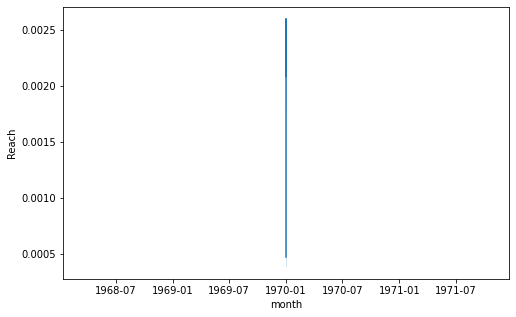

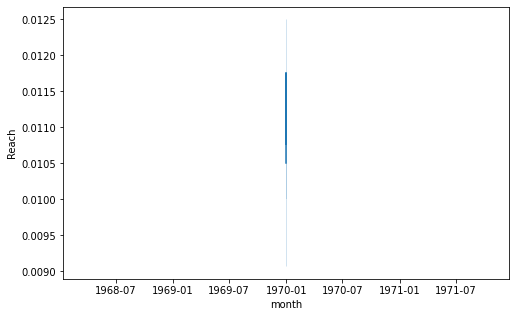

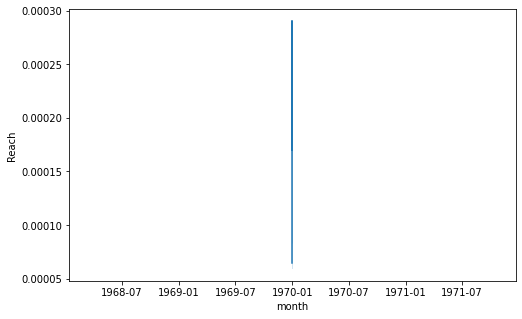

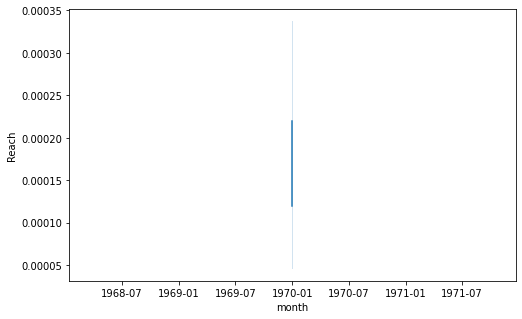

In [ ]:
for id in lis_uuid:
    random_var=df[df["UUID"]==id]
    sns.lineplot(data=random_var,x='month',y='Reach')
    plt.show()

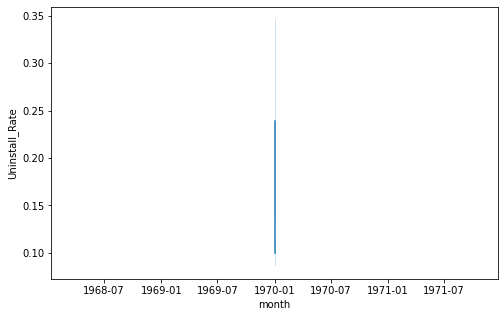

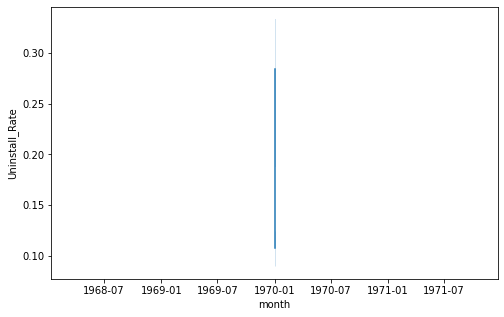

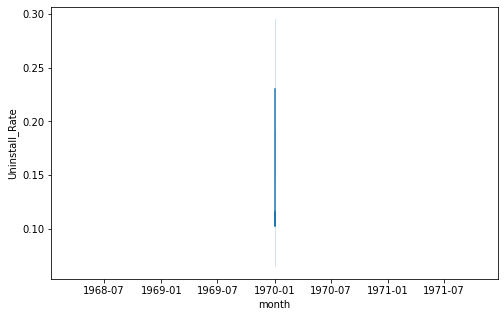

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


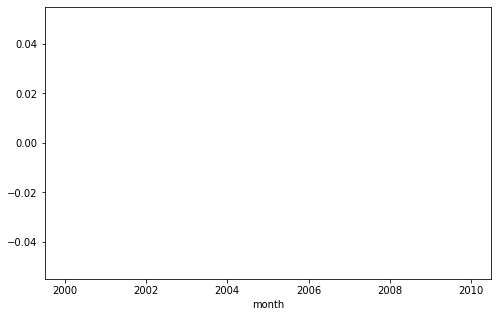

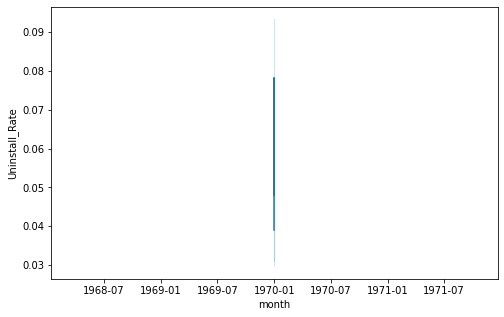

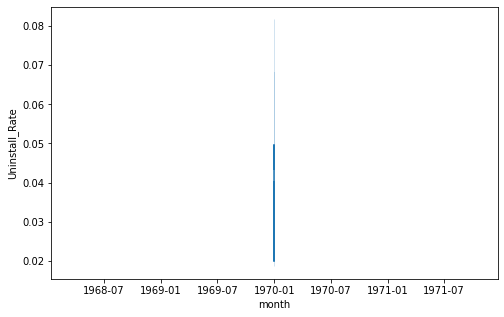

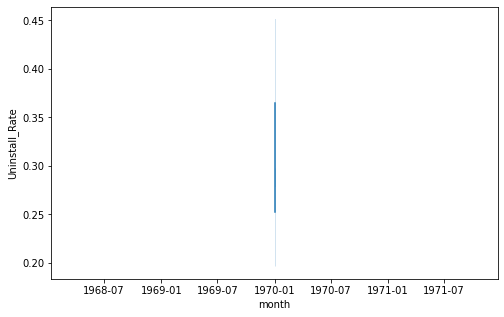

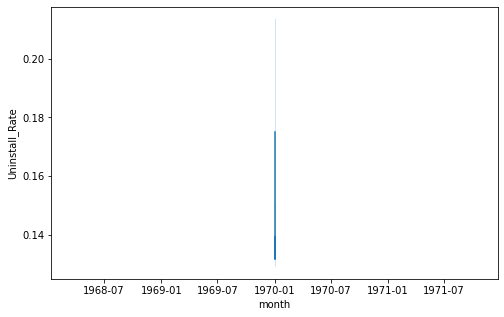

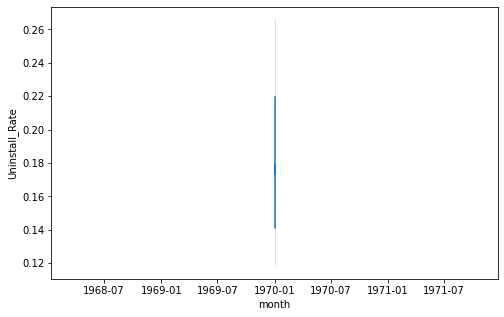

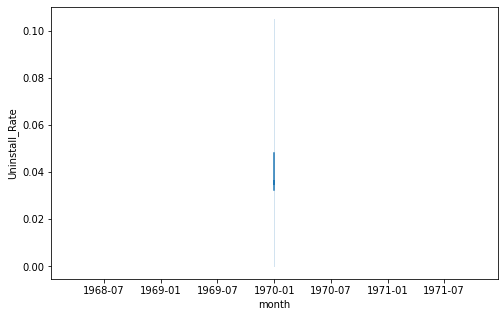

In [ ]:
for id in lis_uuid:
    random_var=df[df["UUID"]==id]
    sns.lineplot(data=random_var,x='month',y='Uninstall_Rate')
    plt.show()

In [ ]:
df=df.drop(columns=['Region'])

In [ ]:
set(df.columns.to_list())-set(grouped_df.columns.to_list())

{'Application Category',
 'Business Models',
 'City',
 'Company Stage',
 'Feed Name',
 'Founded Year',
 'Latest Funded Date',
 'Overview',
 'Practice Areas',
 'month'}

In [ ]:
aver_list=['Avg_Session_Time', 'MAU', 'Open_Rate', 'Reach', 'Total Funding (USD)',
       'Total_Session_Time', 'Uninstall_Rate', 'funding_ind']

In [ ]:
def ffbf(x):
    return x.interpolate().ffill().bfill()

In [ ]:
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Total Funding (USD)', 'Total_Session_Time', 'Uninstall_Rate',
       'funding_ind'],
      dtype='object')

In [ ]:
grouped_df=df.groupby("UUID").agg(list)

In [ ]:
grouped_df

,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
UUID,,,,,,,,,,,,,,,,,,
000066f130e3b972364c505c805e2cddee68816d,"[1970-01-01 00:00:00.020200301, 1970-01-01 00:...","[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[1970-01-01 00:00:00.020200401],[Finance],[nan],[nan],[nan],[nan],[nan],[NaT],[NaT],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[nan],[nan],[nan],[0]
0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[1970-01-01 00:00:00.020200301, 1970-01-01 00:...","[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[NaT, NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT, NaT]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]"
000127cbe70aeeab81734b68f409176bd1f1fde8,"[1970-01-01 00:00:00.020200301, 1970-01-01 00:...","[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]"
00017d2a013dc43f0e34de1be4beca443713ec80,[1970-01-01 00:00:00.020200301],[Shopping],[nan],[nan],[nan],[nan],[nan],[NaT],[NaT],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[nan],[nan],[nan],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[1970-01-01 00:00:00.020191201, 1970-01-01 00:...","[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[NaT, NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT, NaT]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]"
ffff383fa0831aa6d2c5d9257194d0d89841422d,"[1970-01-01 00:00:00.020200301, 1970-01-01 00:...","[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, ...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.55, 1.0, nan, 1.3205128205128205, 2.0327868...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.916264738648019e-07, 5.916264738648019e-07,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[34.25681208333334, 2.9301666666666666, nan, 1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
ffff

In [ ]:
lst_col='month'
pd.DataFrame({ col:np.repeat(grouped_df[col].values, grouped_df[lst_col].str.len())
                for col in grouped_df.columns.drop(lst_col) } )

,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
1,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
2,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
3,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
4,[Finance],[nan],[nan],[nan],[nan],[nan],[NaT],[NaT],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[nan],[nan],[nan],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500688,"[Finance, Finance]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[NaT, NaT]","[NaT, NaT]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[3.022202611485277e-07, 9.066607834455828e-07]","[nan, nan]","[nan, nan]","[nan, nan]","[0, 0]"
1500689,"[Finance, Finance]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[NaT, NaT]","[NaT, NaT]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[3.022202611485277e-07, 9.066607834455828e-07]","[nan, nan]","[nan, nan]","[nan, nan]","[0, 0]"
1500690,"[Casual, Casual, Casual]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[nan, nan, nan]","[nan, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[0, 0, 0]"
1500691,"[Casual, Casual, Casual]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[nan, nan, nan]","[nan, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[0, 0, 0]"


In [ ]:
import datetime

In [ ]:
df['Latest Funded Date'].dropna()

147       2018-09-10
212       2018-09-19
2324      2018-11-19
2624      2018-11-01
3374      2018-10-01
             ...    
1500587   2019-03-30
1500588   2019-03-30
1500589   2019-03-30
1500590   2019-03-30
1501153   2019-03-06
Name: Latest Funded Date, Length: 2414, dtype: datetime64[ns]

In [ ]:
grouped=df.groupby("UUID").apply(lambda x: x.interpolate(method='index').ffill().bfill())
grouped=grouped.loc[:,grouped.isna().mean()<0.9]

In [ ]:
aggregated_df=df.pivot_table(index=["UUID","Application Category",'month'],aggfunc=np.median).interpolate().ffill().bfill()
aggregated_df=aggregated_df.reset_index()
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,Business,1970-01-01 00:00:00.020200301,1.471044,0.475634,3.0,1.972088e-07,1410068.0,4.413133,0.026207,0
1,000066f130e3b972364c505c805e2cddee68816d,Business,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0
2,000066f130e3b972364c505c805e2cddee68816d,Business,1970-01-01 00:00:00.020200601,1.471044,0.475634,3.0,4.889378e-06,1410068.0,4.413133,0.026207,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200201,1.471044,0.475634,3.0,1.334363e-06,1410068.0,4.413133,0.026207,0
...,...,...,...,...,...,...,...,...,...,...,...
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200601,1.516300,0.666667,1.0,5.037004e-07,47422120.0,1.516300,0.025641,0
945180,ffff74dbc24df592b6355be32f5a71adeefb3b48,Finance,1970-01-01 00:00:00.020200401,0.789208,0.666667,1.0,6.044405e-07,47422120.0,0.789208,0.025641,0
945181,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,1970-01-01 00:00:00.020200201,0.062117,0.666667,1.0,4.008247e-07,47422120.0,0.062117,0.025641,0
945182,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,1970-01-01 00:00:00.020200301,0.062117,0.666667,1.0,1.972088e-07,47422120.0,0.062117,0.025641,0


In [ ]:
companies_funded=aggregated_df[aggregated_df['funding_ind']==1]['UUID'].unique()

In [ ]:
for elem in ['UUID', 'Avg_Session_Time', 'Open_Rate', 'Reach','Total_Session_Time','Total Funding (USD)','Uninstall_Rate']:
  aggregated_df[f'{elem}_3']=aggregated_df[elem].shift(periods=3)
  aggregated_df[f'{elem}_2']=aggregated_df[elem].shift(periods=2)
  aggregated_df[f'{elem}_1']=aggregated_df[elem].shift(periods=1)

In [ ]:
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID_3,UUID_2,UUID_1,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
0,000066f130e3b972364c505c805e2cddee68816d,Business,1970-01-01 00:00:00.020200301,1.471044,0.475634,3.0,1.972088e-07,1410068.0,4.413133,0.026207,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000066f130e3b972364c505c805e2cddee68816d,Business,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0,NaN,NaN,000066f130e3b972364c505c805e2cddee68816d,NaN,NaN,1.471044,NaN,NaN,3.0,NaN,NaN,1.972088e-07,NaN,NaN,4.413133,NaN,NaN,1410068.0,NaN,NaN,0.026207
2,000066f130e3b972364c505c805e2cddee68816d,Business,1970-01-01 00:00:00.020200601,1.471044,0.475634,3.0,4.889378e-06,1410068.0,4.413133,0.026207,0,NaN,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,NaN,1.471044,1.471044,NaN,3.000000,3.0,NaN,1.972088e-07,3.022203e-07,NaN,4.413133,4.413133,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,1.471044,1.471044,1.471044,3.000000,3.000000,3.0,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200201,1.471044,0.475634,3.0,1.334363e-06,1410068.0,4.413133,0.026207,0,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,1.471044,1.471044,1.471044,3.000000,3.000000,3.0,3.022203e-07,4.889378e-06,3.022203e-07,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200601,1.516300,0.666667,1.0,5.037004e-07,47422120.0,1.516300,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,1.157207,1.229805,1.302404,1.904762,1.952381,2.0,1.972088e-07,3.022203e-07,4.029603e-07,2.184394,2.394601,2.604808,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945180,ffff74dbc24df592b6355be32f5a71adeefb3b48,Finance,1970-01-01 00:00:00.020200401,0.789208,0.666667,1.0,6.044405e-07,47422120.0,0.789208,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,1.229805,1.302404,1.516300,1.952381,2.000000,1.0,3.022203e-07,4.029603e-07,5.037004e-07,2.394601,2.604808,1.516300,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945181,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,1970-01-01 00:00:00.020200201,0.062117,0.666667,1.0,4.008247e-07,47422120.0,0.062117,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff74dbc24df592b6355be32f5a71adeefb3b48,1.302404,1.516300,0.789208,2.000000,1.000000,1.0,4.029603e-07,5.037004e-07,6.044405e-07,2.604808,1.516300,0.789208,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945182,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,1970-01-01 00:00:00.020200301,0.062117,0.666667,1.0,1.972088e-07,47422120.0,0.062117,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff74dbc24df592b6355be32f5a71adeefb3b48,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,1.516300,

In [ ]:
aggregated_df=aggregated_df[(aggregated_df['UUID_3']==aggregated_df["UUID_1"]) & (aggregated_df['UUID_2']==aggregated_df["UUID_1"])]
aggregated_df.head()

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID_3,UUID_2,UUID_1,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,1.471044,1.471044,1.471044,3.0,3.0,3.0,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200501,0.732711,0.475634,1.5,2.042943e-05,1410068.0,1.468233,0.026207,0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,1.471044,1.224933,0.978822,3.0,2.5,2.0,1.334363e-06,2.366506e-06,9.066608e-07,4.413133,3.431500,2.449867,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200601,0.486600,0.475634,1.0,4.889378e-06,1410068.0,0.486600,0.026207,0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,1.224933,0.978822,0.732711,2.5,2.0,1.5,2.366506e-06,9.066608e-07,2.042943e-05,3.431500,2.449867,1.468233,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
9,000127cbe70aeeab81734b68f409176bd1f1fde8,Personalization,1970-01-01 00:00:00.020200301,0.190200,0.475634,2.0,1.972088e-07,1410068.0,0.380400,0.026207,0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0.978822,0.732711,0.486600,2.0,1.5,1.0,9.066608e-07,2.042943e-05,4.889378e-06,2.449867,1.468233,0.486600,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
12,00017d2a013dc43f0e34de1be4beca443713ec80,Shopping,1970-01-01 00:00:00.020200301,0.661142,0.475634,1.0,1.972088e-07,1410068.0,0.661142,0.026207,0,000127cbe70aeeab81734b68f409176bd1f1fde8,000127cbe70aeeab81734b68f409176bd1f1fde8,000127cbe70aeeab81734b68f409176bd1f1fde8,0.190200,0.277208,0.364217,2.0,1.5,1.0,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207


In [ ]:
aggregated_df=aggregated_df.drop(columns=['UUID_3'	,'UUID_2'	,'UUID_1'])
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.000000,3.022203e-07,1410068.0,4.413133,0.026207,0,1.471044,1.471044,1.471044,3.000000,3.000000,3.000000,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200501,0.732711,0.475634,1.500000,2.042943e-05,1410068.0,1.468233,0.026207,0,1.471044,1.224933,0.978822,3.000000,2.500000,2.000000,1.334363e-06,2.366506e-06,9.066608e-07,4.413133,3.431500,2.449867,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200601,0.486600,0.475634,1.000000,4.889378e-06,1410068.0,0.486600,0.026207,0,1.224933,0.978822,0.732711,2.500000,2.000000,1.500000,2.366506e-06,9.066608e-07,2.042943e-05,3.431500,2.449867,1.468233,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
9,000127cbe70aeeab81734b68f409176bd1f1fde8,Personalization,1970-01-01 00:00:00.020200301,0.190200,0.475634,2.000000,1.972088e-07,1410068.0,0.380400,0.026207,0,0.978822,0.732711,0.486600,2.000000,1.500000,1.000000,9.066608e-07,2.042943e-05,4.889378e-06,2.449867,1.468233,0.486600,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
12,00017d2a013dc43f0e34de1be4beca443713ec80,Shopping,1970-01-01 00:00:00.020200301,0.661142,0.475634,1.000000,1.972088e-07,1410068.0,0.661142,0.026207,0,0.190200,0.277208,0.364217,2.000000,1.500000,1.000000,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945176,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200301,1.157207,0.666667,1.904762,1.972088e-07,47422120.0,2.184394,0.025641,0,1.843433,0.547458,1.084608,1.227273,1.041667,1.857143,4.533304e-06,2.042943e-05,4.889378e-06,1.898486,0.574903,1.974188,47422120.0,47422120.0,47422120.0,0.066667,0.022222,0.025641
945177,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200401,1.229805,0.666667,1.952381,3.022203e-07,47422120.0,2.394601,0.025641,0,0.547458,1.084608,1.157207,1.041667,1.857143,1.904762,2.042943e-05,4.889378e-06,1.972088e-07,0.574903,1.974188,2.184394,47422120.0,47422120.0,47422120.0,0.022222,0.025641,0.025641
945178,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200501,1.302404,0.666667,2.000000,4.029603e-07,47422120.0,2.604808,0.025641,0,1.084608,1.157207,1.229805,1.857143,1.904762,1.952381,4.889378e-06,1.972088e-07,3.022203e-07,1.974188,2.184394,2.394601,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200601,1.516300,0.666667,1.000000,5.037004e-07,47422120.0,1.516300,0.025641,0,1.157207,1.229805,1.302404,1.904762,1.952381,2.000000,1.972088e-07,3.022203e-07,4.029603e-07,2.184394,2.394601,2.604808,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641


In [ ]:
ope_rate=aggregated_df[['Open_Rate_3','Open_Rate_2','Open_Rate_1']].rolling(2,axis=1).mean()

In [ ]:
(((ope_rate['Open_Rate_2']-ope_rate['Open_Rate_1'])/ope_rate['Open_Rate_2'])*100)

3          0.000000
7         18.181818
8         22.222222
9         28.571429
12        28.571429
            ...    
945176   -27.760553
945177   -29.774127
945178    -2.531646
945179    -2.469136
945180    24.096386
Length: 678218, dtype: float64

In [ ]:
ope_rate[['Open_Rate_2','Open_Rate_1']]

,Open_Rate_2,Open_Rate_1
3,3.000000,3.000000
7,2.750000,2.250000
8,2.250000,1.750000
9,1.750000,1.250000
12,1.750000,1.250000
...,...,...
945176,1.134470,1.449405
945177,1.449405,1.880952
945178,1.880952,1.928571
945179,1.928571,1.976190


In [ ]:
aggregated_df['MAU'].value_counts()

0.500000    3168
0.333333    2106
0.250000    1754
0.200000    1424
0.400000    1084
            ... 
0.288513       1
0.173619       1
0.225072       1
0.275276       1
0.347431       1
Name: MAU, Length: 598763, dtype: int64

In [ ]:
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,1970-01-01 00:00:00.020200401,1.471044,0.475634,3.000000,3.022203e-07,1410068.0,4.413133,0.026207,0,1.471044,1.471044,1.471044,3.000000,3.000000,3.000000,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200501,0.732711,0.475634,1.500000,2.042943e-05,1410068.0,1.468233,0.026207,0,1.471044,1.224933,0.978822,3.000000,2.500000,2.000000,1.334363e-06,2.366506e-06,9.066608e-07,4.413133,3.431500,2.449867,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,1970-01-01 00:00:00.020200601,0.486600,0.475634,1.000000,4.889378e-06,1410068.0,0.486600,0.026207,0,1.224933,0.978822,0.732711,2.500000,2.000000,1.500000,2.366506e-06,9.066608e-07,2.042943e-05,3.431500,2.449867,1.468233,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
9,000127cbe70aeeab81734b68f409176bd1f1fde8,Personalization,1970-01-01 00:00:00.020200301,0.190200,0.475634,2.000000,1.972088e-07,1410068.0,0.380400,0.026207,0,0.978822,0.732711,0.486600,2.000000,1.500000,1.000000,9.066608e-07,2.042943e-05,4.889378e-06,2.449867,1.468233,0.486600,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
12,00017d2a013dc43f0e34de1be4beca443713ec80,Shopping,1970-01-01 00:00:00.020200301,0.661142,0.475634,1.000000,1.972088e-07,1410068.0,0.661142,0.026207,0,0.190200,0.277208,0.364217,2.000000,1.500000,1.000000,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945176,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200301,1.157207,0.666667,1.904762,1.972088e-07,47422120.0,2.184394,0.025641,0,1.843433,0.547458,1.084608,1.227273,1.041667,1.857143,4.533304e-06,2.042943e-05,4.889378e-06,1.898486,0.574903,1.974188,47422120.0,47422120.0,47422120.0,0.066667,0.022222,0.025641
945177,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200401,1.229805,0.666667,1.952381,3.022203e-07,47422120.0,2.394601,0.025641,0,0.547458,1.084608,1.157207,1.041667,1.857143,1.904762,2.042943e-05,4.889378e-06,1.972088e-07,0.574903,1.974188,2.184394,47422120.0,47422120.0,47422120.0,0.022222,0.025641,0.025641
945178,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200501,1.302404,0.666667,2.000000,4.029603e-07,47422120.0,2.604808,0.025641,0,1.084608,1.157207,1.229805,1.857143,1.904762,1.952381,4.889378e-06,1.972088e-07,3.022203e-07,1.974188,2.184394,2.394601,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,1970-01-01 00:00:00.020200601,1.516300,0.666667,1.000000,5.037004e-07,47422120.0,1.516300,0.025641,0,1.157207,1.229805,1.302404,1.904762,1.952381,2.000000,1.972088e-07,3.022203e-07,4.029603e-07,2.184394,2.394601,2.604808,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641


In [ ]:
aggregated_df['target']=0

In [ ]:
for elem in ['funding_ind','UUID']:
    aggregated_df[f'{elem}_3']=aggregated_df[elem].shift(periods=-3)
    aggregated_df[f'{elem}_2']=aggregated_df[elem].shift(periods=-2)
    aggregated_df[f'{elem}_1']=aggregated_df[elem].shift(periods=-1)

In [ ]:
aggregated_df["Total"]=aggregated_df['funding_ind_1']+aggregated_df['funding_ind_3']+aggregated_df['funding_ind_2']

In [ ]:
aggregated_df['target']=[1 if var== True else 0 for var in (aggregated_df["Total"]>0).values ]

In [ ]:
aggregated_df=aggregated_df[(aggregated_df['UUID_3']==aggregated_df["UUID_1"]) & (aggregated_df['UUID_2']==aggregated_df["UUID_1"])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


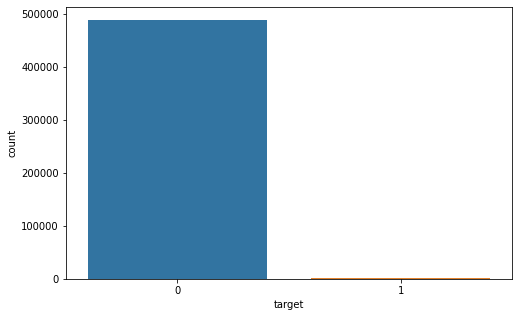

In [ ]:
sns.countplot(aggregated_df['target'])

In [ ]:
aggregated_df=aggregated_df.drop(columns=['UUID_3'	,'UUID_2'	,'UUID_1'])

In [ ]:
aggregated_df=aggregated_df.dropna()

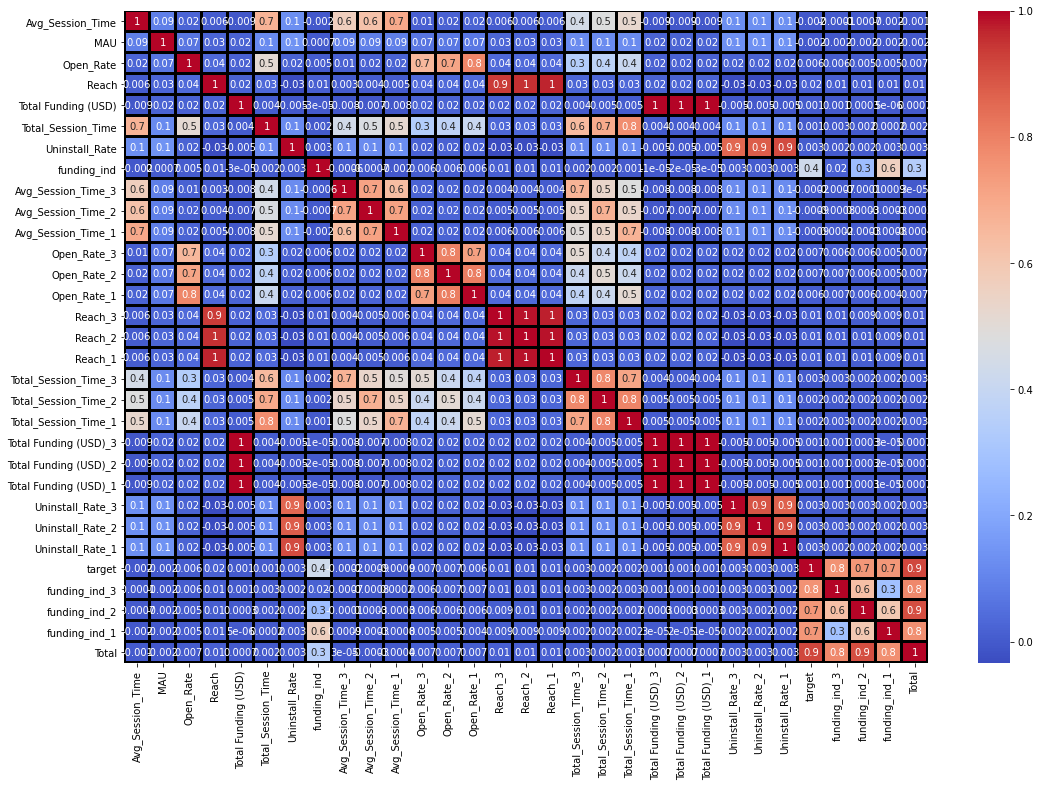

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(aggregated_df.corr(),annot=True,cmap='coolwarm',linewidths=2,fmt='.1g', linecolor='black')

In [ ]:
List=[ 'Avg_Session_Time', 'Open_Rate', 'Reach','Total_Session_Time','Uninstall_Rate', 'funding_ind']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
aggregated_df['Application Category'] = labelencoder.fit_transform(aggregated_df['Application Category'])

In [ ]:
sample_df=aggregated_df[aggregated_df['target']==0].sample(frac=0.05, random_state=1)

In [ ]:
sample_df=pd.concat([sample_df,aggregated_df[aggregated_df['target']==1]])

In [ ]:
X=sample_df.drop(columns=['funding_ind','funding_ind_1','funding_ind_2','funding_ind_3','month','target','Total','UUID'])

In [ ]:
y=sample_df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()

rf = RandomForestClassifier( bootstrap= True,max_depth= 9,min_samples_leaf= 45,min_samples_split= 60,n_estimators= 120)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=45, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

In [ ]:
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.08%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6115
           1       0.68      0.07      0.12       400

    accuracy                           0.94      6515
   macro avg       0.81      0.53      0.55      6515
weighted avg       0.93      0.94      0.92      6515



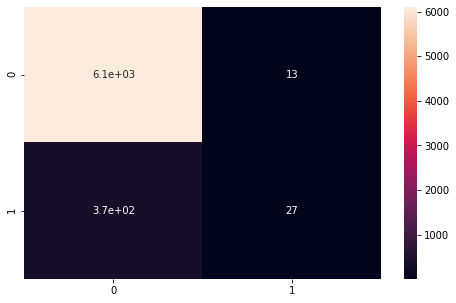

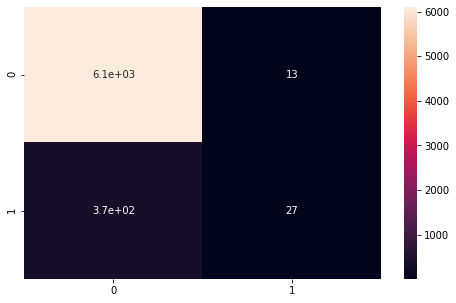

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)